# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [2]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()


W0723 21:40:19.875430 13780 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 21:40:19.935776 13780 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 21:40:19.944694 13780 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total para

In [8]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]



In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)



model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)



W0723 21:40:20.057238 13780 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 21:40:20.066627 13780 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0723 21:40:20.174151 13780 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0723 21:40:20.283973 13780 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.as

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.9371 - acc: 0.2890 - val_loss: 1.7700 - val_acc: 0.3627
Epoch 2/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.7131 - acc: 0.3817 - val_loss: 1.6485 - val_acc: 0.4109
Epoch 3/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.6330 - acc: 0.4132 - val_loss: 1.6558 - val_acc: 0.4053
Epoch 4/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.5602 - acc: 0.4385 - val_loss: 1.5734 - val_acc: 0.4399
Epoch 5/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.5077 - acc: 0.4589 - val_loss: 1.5111 - val_acc: 0.4573
Epoch 6/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.4739 - acc: 0.4716 - val_loss: 1.4915 - val_acc: 0.4648
Epoch 7/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.4420 - acc: 0.4837 - val_loss: 1.4621 -

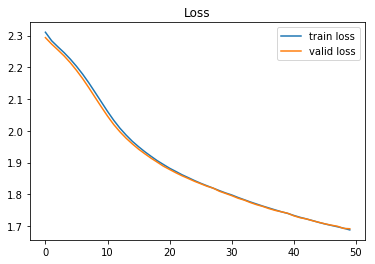

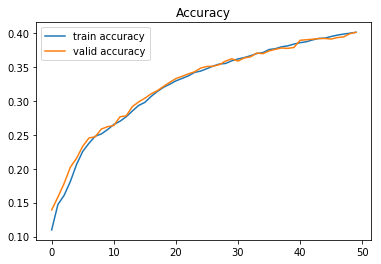

In [14]:
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [11]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [12]:
results = {}
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000, Momentum = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               

50000/50000 [==============================] - 6s 129us/step - loss: 0.7367 - acc: 0.7344 - val_loss: 1.9819 - val_acc: 0.4877
Experiment with LR = 0.100000, Momentum = 0.90
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None

50000/50000 [==============================] - 6s 129us/step - loss: 1.0953 - acc: 0.6112 - val_loss: 1.6963 - val_acc: 0.4739
Epoch 50/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.1043 - acc: 0.6090 - val_loss: 1.6442 - val_acc: 0.4815
Experiment with LR = 0.100000, Momentum = 0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)      

50000/50000 [==============================] - 6s 130us/step - loss: 1.5325 - acc: 0.4686 - val_loss: 1.6593 - val_acc: 0.4292
Epoch 49/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.5155 - acc: 0.4752 - val_loss: 1.6230 - val_acc: 0.4403
Epoch 50/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.5016 - acc: 0.4797 - val_loss: 1.6344 - val_acc: 0.4367
Experiment with LR = 0.100000, Momentum = 0.99
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense

50000/50000 [==============================] - 7s 130us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 6s 130us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 6s 129us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 6s 129us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000, Momentum = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
______________________________________________________________

Epoch 45/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.8480 - acc: 0.6977 - val_loss: 2.0938 - val_acc: 0.4214
Epoch 46/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.8403 - acc: 0.7037 - val_loss: 1.5929 - val_acc: 0.4989
Epoch 47/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.8141 - acc: 0.7083 - val_loss: 1.6161 - val_acc: 0.4845
Epoch 48/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.8009 - acc: 0.7173 - val_loss: 1.7108 - val_acc: 0.4892
Epoch 49/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.7951 - acc: 0.7182 - val_loss: 1.6019 - val_acc: 0.5032
Epoch 50/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.7680 - acc: 0.7289 - val_loss: 1.7816 - val_acc: 0.4755
Experiment with LR = 0.010000, Momentum = 0.90
_________________________________________________________________
Layer (type)                 Output Shape            

50000/50000 [==============================] - 9s 176us/step - loss: 0.5397 - acc: 0.8057 - val_loss: 1.9280 - val_acc: 0.5047
Epoch 45/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.5152 - acc: 0.8150 - val_loss: 1.8673 - val_acc: 0.5225
Epoch 46/50
50000/50000 [==============================] - 9s 183us/step - loss: 0.5183 - acc: 0.8153 - val_loss: 1.8185 - val_acc: 0.5244
Epoch 47/50
50000/50000 [==============================] - 9s 181us/step - loss: 0.4941 - acc: 0.8225 - val_loss: 1.9660 - val_acc: 0.5245
Epoch 48/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.4859 - acc: 0.8258 - val_loss: 2.1174 - val_acc: 0.4963
Epoch 49/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.4696 - acc: 0.8315 - val_loss: 2.0997 - val_acc: 0.5180
Epoch 50/50
50000/50000 [==============================] - 9s 173us/step - loss: 0.4512 - acc: 0.8366 - val_loss: 2.1974 - val_acc: 0.5078
Experiment with LR = 0.010000, Momentum

50000/50000 [==============================] - 9s 181us/step - loss: 0.5603 - acc: 0.7978 - val_loss: 1.8259 - val_acc: 0.5199
Epoch 44/50
50000/50000 [==============================] - 9s 182us/step - loss: 0.5493 - acc: 0.8045 - val_loss: 1.8443 - val_acc: 0.5254
Epoch 45/50
50000/50000 [==============================] - 9s 183us/step - loss: 0.5316 - acc: 0.8087 - val_loss: 1.8849 - val_acc: 0.5258
Epoch 46/50
50000/50000 [==============================] - 9s 187us/step - loss: 0.5268 - acc: 0.8093 - val_loss: 2.1000 - val_acc: 0.5075
Epoch 47/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.5018 - acc: 0.8193 - val_loss: 1.9836 - val_acc: 0.5253
Epoch 48/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.5031 - acc: 0.8181 - val_loss: 1.9663 - val_acc: 0.5303
Epoch 49/50
50000/50000 [==============================] - 9s 181us/step - loss: 0.4713 - acc: 0.8298 - val_loss: 2.0128 - val_acc: 0.5313
Epoch 50/50
50000/50000 [=============

50000/50000 [==============================] - 9s 172us/step - loss: 0.9141 - acc: 0.6757 - val_loss: 1.5849 - val_acc: 0.5082
Epoch 43/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.9153 - acc: 0.6755 - val_loss: 1.6348 - val_acc: 0.4977
Epoch 44/50
50000/50000 [==============================] - 9s 170us/step - loss: 0.9022 - acc: 0.6804 - val_loss: 1.6634 - val_acc: 0.5040
Epoch 45/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.8952 - acc: 0.6827 - val_loss: 1.6707 - val_acc: 0.5032
Epoch 46/50
50000/50000 [==============================] - 8s 170us/step - loss: 0.8741 - acc: 0.6914 - val_loss: 1.6634 - val_acc: 0.5077
Epoch 47/50
50000/50000 [==============================] - 8s 169us/step - loss: 0.8818 - acc: 0.6878 - val_loss: 1.6633 - val_acc: 0.4903
Epoch 48/50
50000/50000 [==============================] - 8s 169us/step - loss: 0.8855 - acc: 0.6839 - val_loss: 1.7016 - val_acc: 0.5035
Epoch 49/50
50000/50000 [==============

50000/50000 [==============================] - 8s 163us/step - loss: 1.4641 - acc: 0.4778 - val_loss: 1.5098 - val_acc: 0.4580
Epoch 42/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.4539 - acc: 0.4822 - val_loss: 1.5032 - val_acc: 0.4633
Epoch 43/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.4527 - acc: 0.4828 - val_loss: 1.5973 - val_acc: 0.4396
Epoch 44/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.4436 - acc: 0.4862 - val_loss: 1.4817 - val_acc: 0.4687
Epoch 45/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.4367 - acc: 0.4887 - val_loss: 1.4724 - val_acc: 0.4743
Epoch 46/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.4286 - acc: 0.4915 - val_loss: 1.5636 - val_acc: 0.4472
Epoch 47/50
50000/50000 [==============================] - 9s 170us/step - loss: 1.4268 - acc: 0.4921 - val_loss: 1.5429 - val_acc: 0.4543
Epoch 48/50
50000/50000 [==============

50000/50000 [==============================] - 7s 148us/step - loss: 1.1410 - acc: 0.5957 - val_loss: 1.3854 - val_acc: 0.5124
Epoch 41/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.1297 - acc: 0.5995 - val_loss: 1.3652 - val_acc: 0.5134
Epoch 42/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.1180 - acc: 0.6027 - val_loss: 1.4876 - val_acc: 0.4870
Epoch 43/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.1113 - acc: 0.6082 - val_loss: 1.3635 - val_acc: 0.5180
Epoch 44/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.1023 - acc: 0.6085 - val_loss: 1.3829 - val_acc: 0.5143
Epoch 45/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.0849 - acc: 0.6146 - val_loss: 1.3725 - val_acc: 0.5189
Epoch 46/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.0790 - acc: 0.6176 - val_loss: 1.4964 - val_acc: 0.4930
Epoch 47/50
50000/50000 [==============

50000/50000 [==============================] - 6s 125us/step - loss: 0.9170 - acc: 0.6728 - val_loss: 1.4516 - val_acc: 0.5166
Epoch 40/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.9120 - acc: 0.6753 - val_loss: 1.4771 - val_acc: 0.5068
Epoch 41/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.8939 - acc: 0.6793 - val_loss: 1.5926 - val_acc: 0.4925
Epoch 42/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.8767 - acc: 0.6857 - val_loss: 1.4727 - val_acc: 0.5193
Epoch 43/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.8642 - acc: 0.6894 - val_loss: 1.4910 - val_acc: 0.5153
Epoch 44/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.8476 - acc: 0.6962 - val_loss: 1.5573 - val_acc: 0.5070
Epoch 45/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.8364 - acc: 0.7030 - val_loss: 1.5589 - val_acc: 0.4993
Epoch 46/50
50000/50000 [==============

50000/50000 [==============================] - 6s 121us/step - loss: 0.6983 - acc: 0.7487 - val_loss: 1.5642 - val_acc: 0.5426
Epoch 38/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.6789 - acc: 0.7578 - val_loss: 1.5795 - val_acc: 0.5424
Epoch 39/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.6738 - acc: 0.7583 - val_loss: 1.5966 - val_acc: 0.5358
Epoch 40/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.6506 - acc: 0.7666 - val_loss: 1.6062 - val_acc: 0.5336
Epoch 41/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.6184 - acc: 0.7820 - val_loss: 1.6828 - val_acc: 0.5415
Epoch 42/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.6081 - acc: 0.7820 - val_loss: 1.7492 - val_acc: 0.5337
Epoch 43/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.6026 - acc: 0.7836 - val_loss: 1.7040 - val_acc: 0.5439
Epoch 44/50
50000/50000 [==============

50000/50000 [==============================] - 6s 125us/step - loss: 1.9902 - acc: 0.2926 - val_loss: 1.9875 - val_acc: 0.2933
Epoch 37/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.9838 - acc: 0.2958 - val_loss: 1.9814 - val_acc: 0.2967
Epoch 38/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.9777 - acc: 0.2977 - val_loss: 1.9756 - val_acc: 0.2989
Epoch 39/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.9717 - acc: 0.3003 - val_loss: 1.9709 - val_acc: 0.2947
Epoch 40/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.9662 - acc: 0.3023 - val_loss: 1.9646 - val_acc: 0.3000
Epoch 41/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.9607 - acc: 0.3036 - val_loss: 1.9595 - val_acc: 0.3055
Epoch 42/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.9554 - acc: 0.3053 - val_loss: 1.9544 - val_acc: 0.3060
Epoch 43/50
50000/50000 [==============

Epoch 35/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.8015 - acc: 0.3610 - val_loss: 1.8023 - val_acc: 0.3646
Epoch 36/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7956 - acc: 0.3630 - val_loss: 1.7956 - val_acc: 0.3631
Epoch 37/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.7901 - acc: 0.3653 - val_loss: 1.7894 - val_acc: 0.3697
Epoch 38/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.7843 - acc: 0.3677 - val_loss: 1.7830 - val_acc: 0.3709
Epoch 39/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.7788 - acc: 0.3690 - val_loss: 1.7802 - val_acc: 0.3738
Epoch 40/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7732 - acc: 0.3716 - val_loss: 1.7721 - val_acc: 0.3743
Epoch 41/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7678 - acc: 0.3738 - val_loss: 1.7665 - val_acc: 0.3763
Epoch 42/50
50000/50000 [==

50000/50000 [==============================] - 6s 124us/step - loss: 1.6378 - acc: 0.4180 - val_loss: 1.6385 - val_acc: 0.4191
Epoch 35/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.6305 - acc: 0.4198 - val_loss: 1.6302 - val_acc: 0.4252
Epoch 36/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.6245 - acc: 0.4224 - val_loss: 1.6263 - val_acc: 0.4265
Epoch 37/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.6178 - acc: 0.4236 - val_loss: 1.6216 - val_acc: 0.4267
Epoch 38/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.6117 - acc: 0.4253 - val_loss: 1.6132 - val_acc: 0.4274
Epoch 39/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.6060 - acc: 0.4286 - val_loss: 1.6083 - val_acc: 0.4292
Epoch 40/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5994 - acc: 0.4314 - val_loss: 1.6016 - val_acc: 0.4324
Epoch 41/50
50000/50000 [==============

50000/50000 [==============================] - 6s 124us/step - loss: 1.2325 - acc: 0.5620 - val_loss: 1.3805 - val_acc: 0.5114
Epoch 34/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.2196 - acc: 0.5672 - val_loss: 1.3796 - val_acc: 0.5128
Epoch 35/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.2078 - acc: 0.5707 - val_loss: 1.3832 - val_acc: 0.5102
Epoch 36/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.1942 - acc: 0.5723 - val_loss: 1.3953 - val_acc: 0.5070
Epoch 37/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.1840 - acc: 0.5761 - val_loss: 1.3809 - val_acc: 0.5185
Epoch 38/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.1686 - acc: 0.5829 - val_loss: 1.3806 - val_acc: 0.5150
Epoch 39/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.1562 - acc: 0.5874 - val_loss: 1.3777 - val_acc: 0.5224
Epoch 40/50
50000/50000 [==============

50000/50000 [==============================] - 6s 122us/step - loss: 2.2677 - acc: 0.1447 - val_loss: 2.2647 - val_acc: 0.1473
Epoch 33/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.2668 - acc: 0.1462 - val_loss: 2.2638 - val_acc: 0.1486
Epoch 34/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.2660 - acc: 0.1479 - val_loss: 2.2629 - val_acc: 0.1506
Epoch 35/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.2651 - acc: 0.1492 - val_loss: 2.2620 - val_acc: 0.1515
Epoch 36/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.2642 - acc: 0.1511 - val_loss: 2.2612 - val_acc: 0.1522
Epoch 37/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.2633 - acc: 0.1531 - val_loss: 2.2603 - val_acc: 0.1535
Epoch 38/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.2625 - acc: 0.1543 - val_loss: 2.2594 - val_acc: 0.1550
Epoch 39/50
50000/50000 [==============

50000/50000 [==============================] - 6s 125us/step - loss: 2.2060 - acc: 0.2219 - val_loss: 2.2046 - val_acc: 0.2224
Epoch 32/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.2027 - acc: 0.2227 - val_loss: 2.2015 - val_acc: 0.2240
Epoch 33/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.1995 - acc: 0.2243 - val_loss: 2.1983 - val_acc: 0.2264
Epoch 34/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.1963 - acc: 0.2255 - val_loss: 2.1952 - val_acc: 0.2273
Epoch 35/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.1931 - acc: 0.2264 - val_loss: 2.1920 - val_acc: 0.2275
Epoch 36/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.1899 - acc: 0.2271 - val_loss: 2.1889 - val_acc: 0.2291
Epoch 37/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.1866 - acc: 0.2288 - val_loss: 2.1856 - val_acc: 0.2302
Epoch 38/50
50000/50000 [==============

50000/50000 [==============================] - 6s 126us/step - loss: 2.1570 - acc: 0.2279 - val_loss: 2.1561 - val_acc: 0.2304
Epoch 31/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.1510 - acc: 0.2305 - val_loss: 2.1501 - val_acc: 0.2310
Epoch 32/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.1450 - acc: 0.2330 - val_loss: 2.1442 - val_acc: 0.2332
Epoch 33/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.1391 - acc: 0.2346 - val_loss: 2.1383 - val_acc: 0.2354
Epoch 34/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.1332 - acc: 0.2382 - val_loss: 2.1325 - val_acc: 0.2376
Epoch 35/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.1273 - acc: 0.2417 - val_loss: 2.1267 - val_acc: 0.2390
Epoch 36/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.1214 - acc: 0.2446 - val_loss: 2.1209 - val_acc: 0.2416
Epoch 37/50
50000/50000 [==============

50000/50000 [==============================] - 6s 125us/step - loss: 1.8196 - acc: 0.3540 - val_loss: 1.8197 - val_acc: 0.3531
Epoch 29/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.8118 - acc: 0.3548 - val_loss: 1.8099 - val_acc: 0.3583
Epoch 30/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.8045 - acc: 0.3588 - val_loss: 1.8030 - val_acc: 0.3617
Epoch 31/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.7981 - acc: 0.3614 - val_loss: 1.7960 - val_acc: 0.3583
Epoch 32/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.7903 - acc: 0.3635 - val_loss: 1.7880 - val_acc: 0.3629
Epoch 33/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.7832 - acc: 0.3661 - val_loss: 1.7820 - val_acc: 0.3645
Epoch 34/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.7761 - acc: 0.3694 - val_loss: 1.7742 - val_acc: 0.3701
Epoch 35/50
50000/50000 [==============

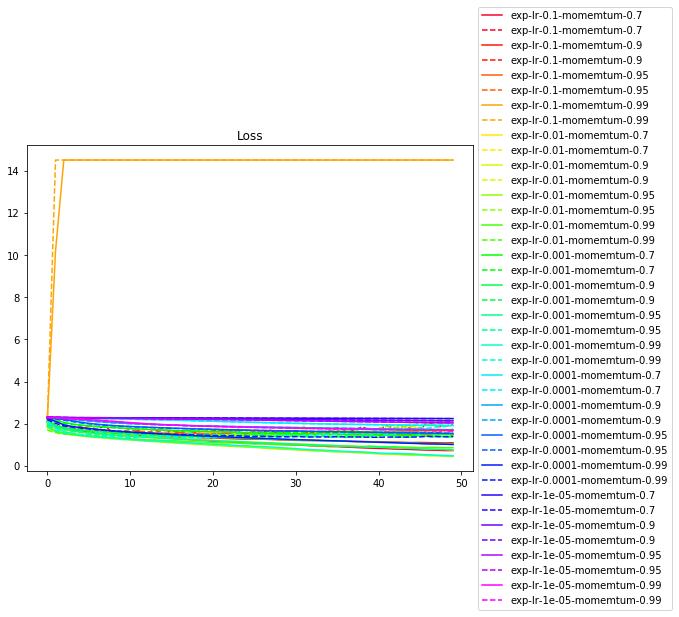

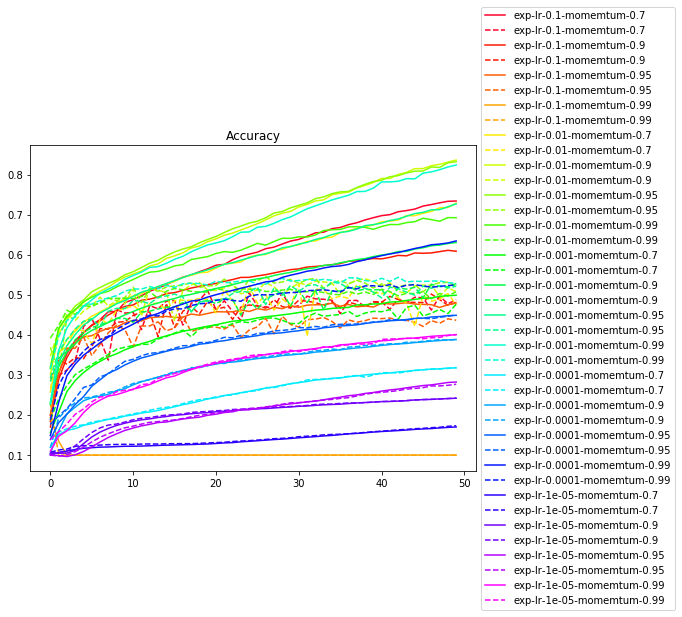

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()